# Data Modeling

In [78]:
from time import time

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, f1_score, matthews_corrcoef

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

We load the data precedently cleaned in data_analysis.ipynb.

In [79]:
data = pd.read_csv("data/clean_data.csv")
x = data.drop("Smoker", axis=1)
y = data["Smoker"]
data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Height,Weight,Number of siblings,Education,Only child,Smoker,Female,Right handed,Living in a city,Living in a flat
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,0,0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,0,1,2.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3,3,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,2,2,1.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,2,2,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0


### Scaling of data

In [80]:
x = pd.DataFrame(data=StandardScaler().fit_transform(x), columns=x.columns, index=x.index)

C:\Users\Shakk17\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shakk17\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Splitting of data

We split the data for **training** (80%) and **testing** (20%).

In [81]:
# We use stratify to keep a balanced amount of values for the target categories.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=17, stratify=y)
x_train.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Education,Only child,Female,Right handed,Living in a city,Living in a flat
890,0.401057,-0.393689,-0.956114,-0.253446,0.812691,-1.567909,-0.607303,0.452080,-0.648204,-0.989025,...,0.868028,0.938933,1.522071,0.705455,0.915760,-0.581192,-1.209097,-3.003331,0.647506,0.828775
189,0.401057,-0.393689,-0.956114,2.382746,-0.117956,0.835525,1.772819,1.314906,-1.491711,-0.989025,...,2.963845,-1.382624,0.333824,0.705455,2.193742,-0.581192,0.827063,0.332964,-1.544388,-1.206599
31,-1.121135,-0.393689,0.757708,-1.132177,0.812691,-0.766764,0.186071,1.314906,-0.648204,-0.989025,...,0.868028,0.358544,0.927948,-0.290131,-0.362223,-0.581192,0.827063,0.332964,0.647506,0.828775
368,0.401057,0.805328,-0.099203,0.625284,-0.117956,0.835525,0.186071,1.314906,1.038810,0.466192,...,-0.179881,-0.802235,-0.854423,0.705455,-0.362223,-0.581192,0.827063,0.332964,-1.544388,-1.206599
925,0.401057,-0.393689,0.757708,-0.253446,-0.117956,-1.567909,0.186071,1.314906,-0.648204,-0.261416,...,-0.179881,-1.382624,-1.448547,-0.290131,-0.362223,-0.581192,0.827063,0.332964,0.647506,0.828775


In [82]:
y_train.value_counts()

0.0    510
1.0    291
Name: Smoker, dtype: int64

### Baseline definition

We define a baseline by using a **dummy classifier** that classifies everything as the most frequent class in the training dataset, "not smoker".

In [83]:
model_dummy = DummyClassifier(strategy="most_frequent")
model_dummy.fit(x_train, y_train)
print("Accuracy: %.1f%%" % (model_dummy.score(x_test, y_test) * 100))

Accuracy: 63.7%


## Models definition

We add a few models to try and get a first glance at what could be successful.

In [84]:
names = [
    # "Nearest Neighbors",
    "Linear SVM",
    "Random Forest",
    "AdaBoost",
    # "Naive Bayes",
    # "MLP Classifier",
    "Logistic Reg."
]

classifiers = [
    # KNeighborsClassifier(n_neighbors=6, weights='uniform'),
    SVC(kernel='rbf', gamma='scale', random_state=17),
    RandomForestClassifier(n_estimators=110, max_depth=6, random_state=17),
    AdaBoostClassifier(learning_rate=0.4, n_estimators=70, random_state=17),
    # GaussianNB(),
    # MLPClassifier(hidden_layer_sizes=(150, ), early_stopping=True, max_iter=400, random_state=17),
    LogisticRegression(solver='saga', penalty='l1', C=0.07, max_iter=200, random_state=17)
]

### Hyperparameters tuning

In [85]:
parameters = [
    {
        #"n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8],
        #"weights": ['uniform', 'distance']
    },
    {
        #"C": [0.7, 0.8, 0.9],
        #"kernel": ['linear', 'rbf', 'poly']
    },
    {
        #"n_estimators": [100, 110, 120],
        #"max_depth": [5, 6, 7]
    },
    {
        #"learning_rate": [0.3, 0.4, 0.5],
        #"n_estimators": [50, 60, 70, 80]
    },
    {},
    {
        #"alpha": [0.0001, 0.001, 0.01, 0.1, 1],
        #"hidden_layer_sizes": [(150, ), (200, ), (250, )]
    },
    {
        #"C": [0.03, 0.05, 0.07],
        #"penalty": ['l1', 'l2']
    }
]

For each model proposed we use **cross-validation** to calculate its accuracy on the training dataset.

In [86]:
accuracies = dict()
for name, clf, par in zip(names, classifiers, parameters):
    grid_obj = GridSearchCV(clf, par, cv=3)
    grid_obj = grid_obj.fit(x_train, y_train)
    # Set the clf to the best combination of parameters
    clf = grid_obj.best_estimator_
    
    # Show mean accuracy of models on the validation sets.
    print("%s: %f" % (name, grid_obj.best_score_))
    print(grid_obj.best_params_)
    accuracies[name] = grid_obj.best_score_

Linear SVM: 0.669164
{}
Random Forest: 0.671660
{}
AdaBoost: 0.685393
{}
Logistic Reg.: 0.676654
{}


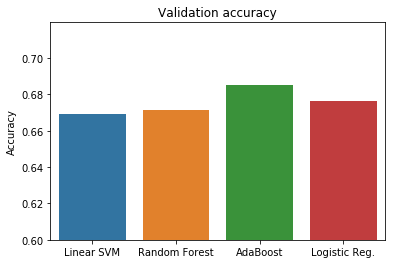

In [102]:
acc = pd.Series(accuracies)
ax = sns.barplot(x=acc.index, y=acc)
ax.set(ylim=(0.6, None))
ax.set_title("Validation accuracy")
ax.set_ylabel("Accuracy");

**AdaBoost** looks to be the best model after cross-validation. But how do these models behave with unknown data?

In [105]:
stats = dict()
for name, clf in zip(names, classifiers):
    t0 = time()
    clf.fit(x_train, y_train)
    t1 = time()
    y_pred = clf.predict(x_test)
    score = clf.score(x_test, y_test)
    prec, rec, f1, supp = precision_recall_fscore_support(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Save results for plotting.
    stats[name] = [t1-t0, score, prec[0], rec[0], f1[0], mcc]
    
    # Prints results.
    print("%s \t Time: %.2fs - Acc: %.3f - Prec: %.3f - Rec: %.3f - F1: %.3f - MCC: %.3f" % (
        name,
        t1 - t0,
        score,
        prec[0],
        rec[0],
        f1[0],
        mcc))
    
    # Prints confusion matrix.
    cm = confusion_matrix(y_test, y_pred)
    print(cm, end='\n\n')

Linear SVM 	 Time: 0.11s - Acc: 0.672 - Prec: 0.689 - Rec: 0.883 - F1: 0.774 - MCC: 0.229
[[113  15]
 [ 51  22]]

Random Forest 	 Time: 0.12s - Acc: 0.677 - Prec: 0.670 - Rec: 0.969 - F1: 0.792 - MCC: 0.237
[[124   4]
 [ 61  12]]

AdaBoost 	 Time: 0.17s - Acc: 0.682 - Prec: 0.708 - Rec: 0.852 - F1: 0.773 - MCC: 0.267
[[109  19]
 [ 45  28]]

Logistic Reg. 	 Time: 0.05s - Acc: 0.701 - Prec: 0.724 - Rec: 0.859 - F1: 0.786 - MCC: 0.318
[[110  18]
 [ 42  31]]



In [112]:
s = pd.DataFrame.from_dict(stats, orient='index', 
                           columns=['Time', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'MCC'])
s.head()

,Time,Accuracy,Precision,Recall,F1 score,MCC
Linear SVM,0.105717,0.671642,0.689024,0.882812,0.773973,0.228555
Random Forest,0.121182,0.676617,0.670270,0.968750,0.792332,0.236542
AdaBoost,0.165557,0.681592,0.707792,0.851562,0.773050,0.267149
Logistic Reg.,0.047872,0.701493,0.723684,0.859375,0.785714,0.318137
